In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamond-price-prediction/diamonds.csv


In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/kaggle/input/diamond-price-prediction/diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
x=df["carat"]
print(x)
x=x[:,np.newaxis]
print(x)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64
[[0.23]
 [0.21]
 [0.23]
 ...
 [0.7 ]
 [0.86]
 [0.75]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
y=df["price"]
print(y)
y=y[:,np.newaxis]
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64
[[ 326]
 [ 326]
 [ 327]
 ...
 [2757]
 [2757]
 [2757]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=101)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(43152, 1)
(10788, 1)
(43152, 1)
(10788, 1)


In [6]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)

LinearRegression()

In [7]:
print(lm.coef_)
print(lm.intercept_)

[[7756.42561797]]
[-2256.36058005]


In [8]:
from sklearn.metrics import r2_score
from sklearn import metrics as mt
from sklearn.metrics import mean_squared_error
y_prediction =  lm.predict(train_x)
print(y_prediction.shape)

(43152, 1)


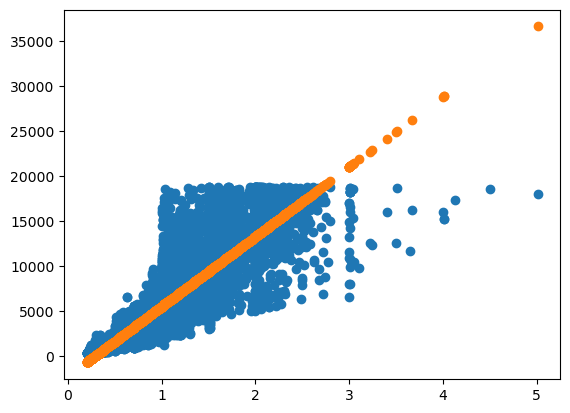

In [9]:
plt.scatter(x,y)
plt.scatter(train_x,y_prediction)

In [10]:
score=r2_score(train_y,y_prediction)
rms = np.sqrt(mean_squared_error(train_y, y_prediction))
print("R2 score is:",score)
print("RMS value is:",rms)
print("The Mean Absolute Error of model is:", np.round(mt.mean_absolute_error(train_y,y_prediction ),2))

R2 score is: 0.8488344532450882
RMS value is: 1550.903404195648
The Mean Absolute Error of model is: 1007.76


<function matplotlib.pyplot.show(close=None, block=None)>

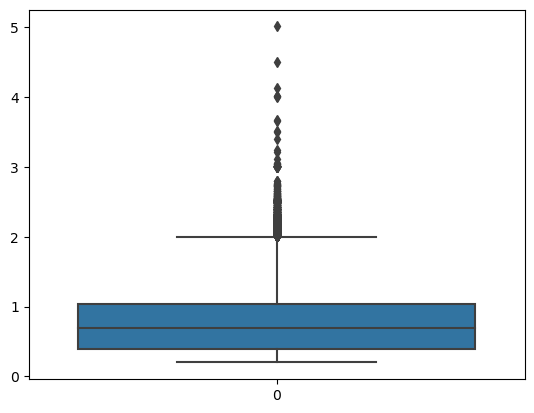

In [11]:
plt1 = sns.boxplot(df['carat'])
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

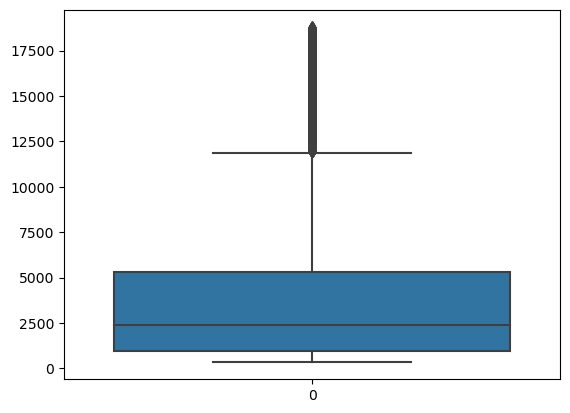

In [12]:
plt2 = sns.boxplot(df['price'])
plt.show

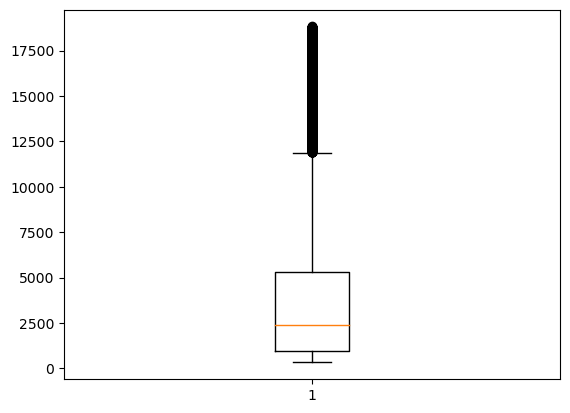

In [13]:
plt.boxplot(df.price)
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]


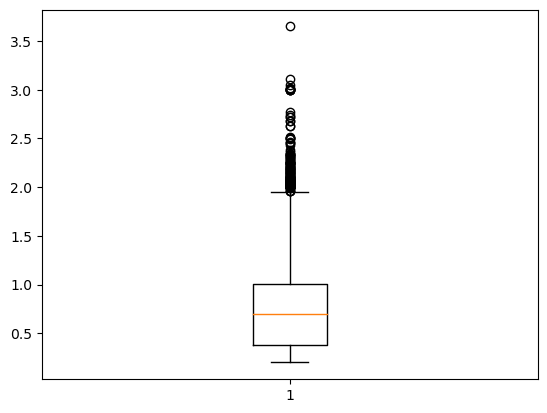

In [14]:
plt.boxplot(df.carat)
Q1 = df.carat.quantile(0.25)
Q3 = df.carat.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.carat >= Q1 - 1.5*IQR) & (df.carat <= Q3 + 1.5*IQR)]

In [15]:
x=df["carat"]
print(x)
x=x[:,np.newaxis]
print(x)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 50119, dtype: float64
[[0.23]
 [0.21]
 [0.23]
 ...
 [0.7 ]
 [0.86]
 [0.75]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
y=df["price"]
print(y)
y=y[:,np.newaxis]
print(y)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 50119, dtype: int64
[[ 326]
 [ 326]
 [ 327]
 ...
 [2757]
 [2757]
 [2757]]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns 
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=22521142)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(40095, 1)
(10024, 1)
(40095, 1)
(10024, 1)


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x, y)
import pickle

# Lưu mô hình
with open('/kaggle/working/best_model.pkl', 'wb') as f:
    pickle.dump(lm, f)


In [19]:
with open('/kaggle/working/best_model.pkl', 'rb') as f:
    lm = pickle.load(f)

print(lm.coef_)
print(lm.intercept_)

[[6773.6955317]]
[-1725.72792897]


In [38]:
from sklearn.metrics import r2_score
from sklearn import metrics as mt
from sklearn.metrics import mean_squared_error
y_prediction =  lm.predict(test_x)
print(y_prediction)

[[ 848.27637308]
 [5115.70455805]
 [5115.70455805]
 ...
 [5115.70455805]
 [ 374.11768586]
 [1322.4350603 ]]


In [43]:
carat_of_diamond = 0.7
test = np.array([[carat_of_diamond]])
a = lm.predict(test)
print(a.item())

3015.8589432265167
